1) 이미지 처리
2) 이미지 필터링
3) 이미지 변환
4) 이미지 특징 추출

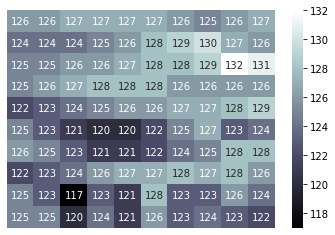

In [10]:
# 1) 이미지 처리
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

img = cv2.imread('C:\\Users\\USER\\MyPython\\openCV\\myImg\\Lenna.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sns.heatmap(img_gray[:10,:10], annot=True, fmt='d', cmap=plt.cm.bone)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'B 채널')

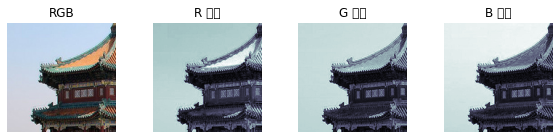

In [27]:
# 1-2) 이미지 처리 - 사이킷런에서 제공해주는 샘플 이미지를 호출 해보자
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_sample_images()     
len(dataset.images)
img_rgb = dataset.images[0]

plt.figure(figsize=(10,2))
plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :], cmap=plt.cm.bone)
plt.axis('off')
plt.title('RGB')

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis('off')
plt.title('R 채널')

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis('off')
plt.title('G 채널')

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis('off')
plt.title('B 채널')

Text(0.5, 1.0, 'B 채널')

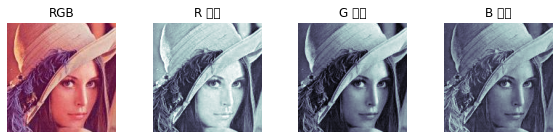

In [28]:
# 1-3) 이미지 처리 - opencv로 이미지를 호출 해보자
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

img = cv2.imread('C:\\Users\\USER\\MyPython\\openCV\\myImg\\Lenna.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,2))
plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :], cmap=plt.cm.bone)
plt.axis('off')
plt.title('RGB')

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis('off')
plt.title('R 채널')

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis('off')
plt.title('G 채널')

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis('off')
plt.title('B 채널')

In [19]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')   
print(china.dtype)
print(china.shape)                      

flower = load_sample_image('flower.jpg') 
print(flower.dtype)
print(flower.shape)                      


uint8
(427, 640, 3)
uint8
(427, 640, 3)


Text(0.5, 1.0, 'img_res')

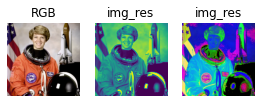

In [36]:
# 1-4) scikit-image 패키지 모듈의 이미지를 확인해보자
import skimage.data
from skimage import color

img = skimage.data.astronaut()

plt.subplot(141)
plt.imshow(img, cmap=plt.cm.bone)
plt.axis('off')
plt.title('RGB')

# 이미지를 가져다가 저장 후 다시 읽어보자
skimage.io.imsave('astronaut.png', img)
img_res = skimage.io.imread('astronaut.png')

plt.subplot(142)
plt.imshow(color.rgb2gray(img_res))
plt.axis('off')
plt.title('img_res')

plt.subplot(143)
plt.imshow(color.rgb2hsv(img_res))
plt.axis('off')
plt.title('img_res')

Text(0.5, 1.0, 'img_rgb')

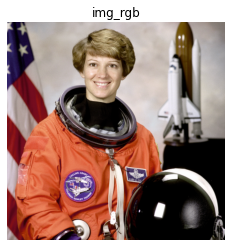

In [37]:
# 1-5) 샘플을 저장한 것을 opencv로 호출
import cv2

image = cv2.imread('astronaut.png')

# 각 채널을 분리해보자
b,g,r = cv2.split(image)

# b ,r을 바꿀수있다.
img_rgb = cv2.merge([r,g,b])

plt.subplot(111)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('img_rgb')

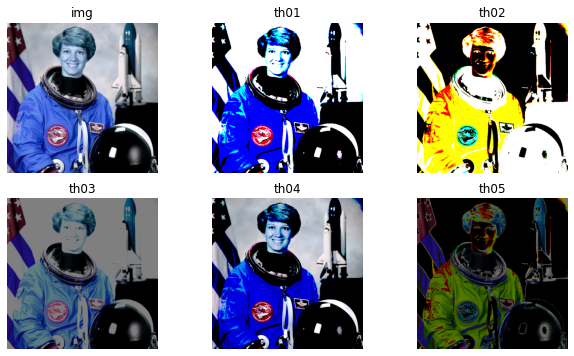

In [58]:
# 2) 이미지 필터링 : 화소 행렬을 다른 값으로 변경하는 것 - 임계값, 적응임계, 필터링, 블러링, 변환
# 2-1) threshold(src, thresh, maxval, type[, dst]) -> retval, dst : 하나의 픽셀값을 기준값으로 이용해서 이진화
# threshold를 사용해보자
'''
-type-
THRESH_BINARY : 기준값을 넘으면 최대값으로 지정하거나 0
THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값
THRESH_TRUNC : 기준값을 넘으면 기준값 아니면 최대값 ex) 기준값 200값으로 잡고 최대값을 150 이미지가 0~180 화소라면 150
THRESH_TOZERO : 기준값을 넘으면 원래값 아니면 0
THRESH_TOZERO_INV : 기준값을 넘으면 0 아니면 원래값
'''
from skimage.data import coins
from skimage import color
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# img = coins()
img = cv2.imread('astronaut.png')

maxvalue = 255
thresh = maxvalue / 2
ret, th01 = cv2.threshold(img, thresh, maxvalue, cv2.THRESH_BINARY)
ret, th02 = cv2.threshold(img, thresh, maxvalue, cv2.THRESH_BINARY_INV)
ret, th03 = cv2.threshold(img, thresh, maxvalue, cv2.THRESH_TRUNC)
ret, th04 = cv2.threshold(img, thresh, maxvalue, cv2.THRESH_TOZERO)
ret, th05 = cv2.threshold(img, thresh, maxvalue, cv2.THRESH_TOZERO_INV)

title = ['img', 'th01', 'th02', 'th03', 'th04', 'th05']
images = [img, th01, th02, th03, th04, th05]
plt.figure(figsize=(9,5))
for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout(pad=0.9)
plt.show()

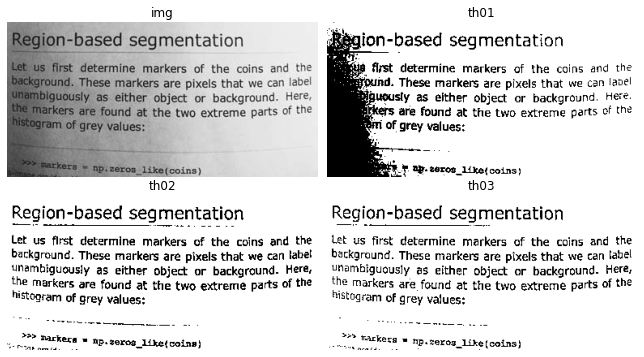

In [62]:
# 2-2) adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst : 일정한 영역내에서 이웃한 픽셀들을 이용해서 기준값을 자체적으로 계산한다.
'''
adaptiveMethod : 기준값을 계산하는 방법
 - ADAPTIVE_THRESH_MEAN_C : 영역내에서 평균값에 C값을 뺀 값을 기준으로 한다.
 - ADAPTIVE_THRESH_GAUSSIAN_C : 가우시안 블러링을 한 후 C 값을 뺀 값을 기준으로 한다.

thresholdType
 - THRESH_BINARY : 기준값을 넘으면 최대값으로 지정하거나 0
 - THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값

blockSize : 적용할 임계처리

C : 평균, 가중평균에서 차감할 것
'''
from skimage.data import coins
from skimage.data import page
from skimage import color
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# img = coins()
img = page()

maxvalue = 255
thresh = 126

ret, th01 = cv2.threshold(img, thresh, maxvalue, cv2.THRESH_BINARY)

blockSize = 15
C = 20

th02 = cv2.adaptiveThreshold(img, maxvalue, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)
th03 = cv2.adaptiveThreshold(img, maxvalue, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

title = ['img', 'th01', 'th02', 'th03']
images = [img, th01, th02, th03]
plt.figure(figsize=(9,5))
for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout(pad=0.9)
plt.show()

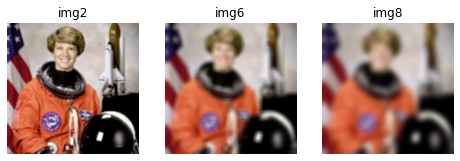

In [72]:
# 2-3) 이미지 샘플을 필터링 해보자
# 이미지의 커널크기가 커지면 이미지가 점점 흐려진다
# 이미지 필터링은 필터, 커널작업으로 정방행렬 정의하고 커널을 이동시켜 같은 이미지와 곱한 결과값
# filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
from skimage.data import astronaut
from skimage import color
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

image = astronaut()
image = cv2.resize(image, dsize=(150,150))

plt.figure(figsize=(8,3))

for i, k in enumerate([2,6,8]):
    kernel = np.ones((k,k)) / k**2
    image = cv2.filter2D(image, -1, kernel = kernel)

    plt.subplot(1,3,i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('img{}'.format(k))
    
plt.show()

Text(0.5, 1.0, 'img_B')

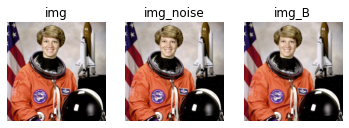

In [99]:
# 2-4) 블러링 작업을 확인 해보자
'''
blur(src, kernel_size) : 픽셀의 평균값으로 균일화 시킨다. 잡음제거, 흑백사진
medianBlur(src, kernel_size) : 중간값으로 균일화 시킨다.
getGaussianKernel(ksize, sigma[, ktype]) : 가우시안 블러링
GaussianBlur(src, kernel_size, sigmaX)
bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst  : 양방향 필터링 

src : 원본 이미지
d : 커널크기
sigmaColor : 색공간 표준편차
sigmaSpace : 거리공간의 표준편차
'''
from skimage.data import astronaut
from skimage import color
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 원본이미지
image = astronaut()
# image = cv2.imread('C:\\Users\\USER\\MyPython\\openCV\\myImg\\cream.jpg')

# 2. 블러 이미지
blur = cv2.blur(image,(5,5))  # (5,5) 영역의 평균값으로 해당 픽셀을 대체한다.

# 3. 잡음 적용 이미지
img_noise = image.copy()
np.random.seed(0)
N = 500
idx1 = np.random.randint(image.shape[0], size=N)
idx2 = np.random.randint(image.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 4. 잡음 제거를 중앙값으로 블러링 한 이미지
img_noise_res = cv2.medianBlur(img_noise, 3)

# 5. 가우시안 블러링을 해보자
img_G = cv2.GaussianBlur(img_noise, (9,9), 2)  # 원본이미지, 커널크기, 표준편차

# 6. bilateralFilter를 사용
img_B = cv2.bilateralFilter(img_noise, 9, 75, 75)

# 원본
plt.subplot(131)
plt.imshow(image)
plt.axis('off')
plt.title('img')

# # 평균 블러
# plt.subplot(152)
# plt.imshow(blur)
# plt.axis('off')
# plt.title('blur')

# 잡음 이미지
plt.subplot(132)
plt.imshow(img_noise)
plt.axis('off')
plt.title('img_noise')

# # 잡음 제거 이미지
# plt.subplot(154)
# plt.imshow(img_noise_res)
# plt.axis('off')
# plt.title('img_noise_res')

# # 가우시안 블러링
# plt.subplot(155)
# plt.imshow(img_G)
# plt.axis('off')
# plt.title('img_G')

# 6. bilateralFilter를 사용
plt.subplot(133)
plt.imshow(img_B)
plt.axis('off')
plt.title('img_B')

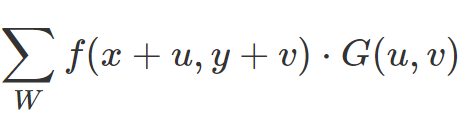
가우시안 블러링 가우시안 함수 G를 커널로 사용한다
가우시안 커널은 가운데 위치 (x,y)와 커널 위치 (x+u, y+v)의 거리차이 (u,v)가 클수록 가중치가 작아진다.

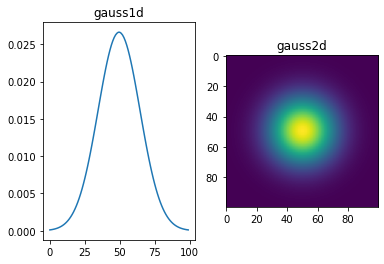

In [96]:
# 2-5) 블러링 작업을 확인 해보자
from skimage.data import astronaut
from skimage import color
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 원본이미지
image = astronaut()
# image = cv2.imread('C:\\Users\\USER\\MyPython\\openCV\\myImg\\cream.jpg')

gauss1d = cv2.getGaussianKernel(100,15)
gauss2d = gauss1d @ gauss1d.T

# 가우시안 커널 값
plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title('gauss1d')

# 가우시안 커널 값2
plt.subplot(122)
# plt.plot(gauss2d)
plt.imshow(gauss2d)
plt.grid(False)
plt.title('gauss2d')
plt.show()

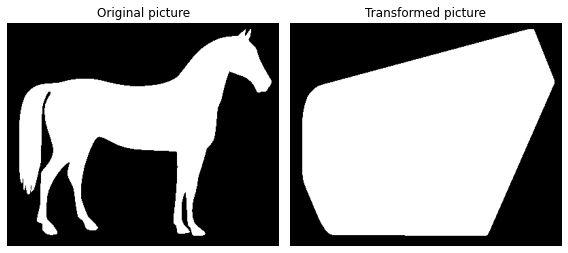

In [100]:
# 2-6) 이미지 변환 작업
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

# The original image is inverted as the object must be white.
image = invert(data.horse())

chull = convex_hull_image(image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

In [105]:
# 2-7) 형태 변환(morphological region)
# 이진화로 변환한 이미지로 침식, 팽창, 그레디언트, 오프닝, 클로징 등의 작업을 할 떼 같이 사용한다.
# cv2.getStructuringElement(shape, ksize[, anchor]) -> retval
# shape : cv2.MORPH_RECT / cv2.MORPH_ELLIPSE / cv2.MORPH_CROSS

a1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  # 이진화로 변환 시 흰색이 1, 검정이 0
a2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
a3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

print(a1)
print('==========================')
print(a2)
print('==========================')
print(a3)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


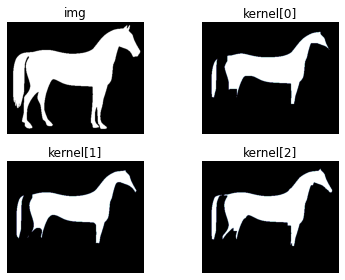

In [111]:
# 2-8) 침식 : 각 픽셀에 커널을 적용해서 커널 영역의 최솟값으로 해당 픽셀을 대처한다.
# 이진화 작업은 0(검정)과 1(흰색)로 이루어진다.
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT,size)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS,size)

title = ['kernel[0]','kernel[1]','kernel[2]']

# 원본이미지
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('img')

# 침식화 cv2.erode(src, kernel)
for i in range(3):
    res = cv2.erode(img, kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(res, cmap='bone')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

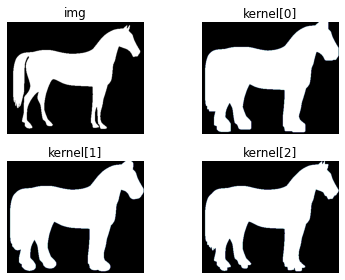

In [112]:
# 2-9) 팽창 : 각 픽셀에 커널을 적용해서 커널 영역의 최댓값으로 해당 픽셀을 대처한다.
# 이진화 작업은 0(검정)과 1(흰색)로 이루어진다.
# 
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT,size)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS,size)

title = ['kernel[0]','kernel[1]','kernel[2]']

# 원본이미지
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('img')

# 침식화 cv2.dilate(src, kernel)
for i in range(3):
    res = cv2.dilate(img, kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(res, cmap='bone')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 2-10) 그레디언트 : 팽창으로 확장된 영역 - 침식으로 축소된 영역 = 영역  --> 윤곽선을 추출
# 오프닝 : 침식 -> 팽창을 적용한다. 결과 : 적용영역이 둥글게 된다(점, 작은 물체, 돌기)
# 클로즈 : 팽창 -> 침식 : 윤곽 확인
'''
morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
* op
 - cv2.MORPH_OPEN  -> cv2.dilate(cv2.erode(img))
 - cv2.MORPH_CLOSE  -> cv2.erode(cv2.dilate(img))
 - cv2.MORPH_GRADIENT  -> cv2.dilate - cv2.erode
 - cv2.MORPH_TOPHAT  -> opening(img)
 - cv2.MORPH_BLACKHAT  -> closing(img)
'''

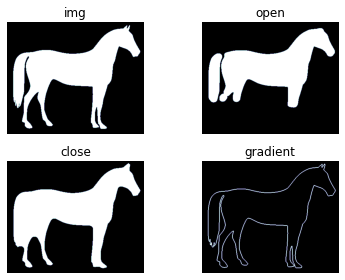

In [115]:
# 2-10) 그레디언트 : 팽창으로 확장된 영역 - 침식으로 축소된 영역 = 영역  --> 윤곽선을 추출
# 오프닝 : 침식 -> 팽창을 적용한다. 결과 : 적용영역이 둥글게 된다(점, 작은 물체, 돌기)
# 클로즈 : 팽창 -> 침식 : 윤곽 확인
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
open = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size))
close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size))
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))

title = ['img','open','close','gradient']
images = [img, open, close, gradient]


for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='bone')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'blobs')

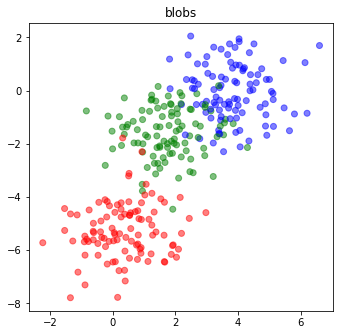

In [132]:
# 번외편
import matplotlib.pyplot as plt
from sklearn import datasets

base_color = ['r','g','b','y','k']
plt.subplots(figsize=(12,18))
plt.subplot(321)

data, target = datasets.make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

colors = [base_color[class_] for class_ in target]
plt.scatter(data.T[0], data.T[1], color=colors, alpha=0.5)
plt.title('blobs')